In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('BostonHousePrice.csv')

In [64]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [65]:
data_ = data.loc[:,['LSTAT','MEDV']]
data_.head(5)

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


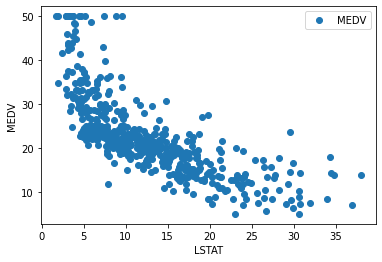

In [66]:
data.plot(x='LSTAT', y='MEDV', style='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [67]:
x = pd.DataFrame(data['LSTAT'])
y = pd.DataFrame(data['MEDV'])

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size=0.2, random_state=1)

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [70]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [71]:
print(regressor.intercept_)
print(regressor.coef_)

[34.33497839]
[[-0.92441715]]


In [72]:
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred
y_test

,MEDV
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
92,22.9
224,44.8
110,21.7
426,10.2


In [73]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,
y_pred)))

MAE:  5.078127727696938
MSE:  46.99482091954711
RMSE:  6.855276866731723


(5.680140479854408, 55.456374911360264, 6.123058776272388, 55.89929320777824)

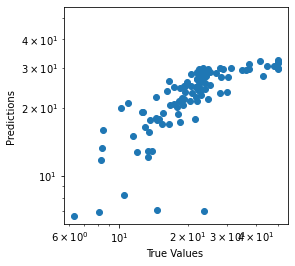

In [74]:
g=plt.scatter(y_test, y_pred)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')